# ALBUM ART STATS

---

Let's start by importing required libraries:

In [1]:
import json
import urllib.request
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

We now parse photos into JSON object and see the content of the it.

In [2]:
# url
url = "https://jsonplaceholder.typicode.com/photos"

# download data
data = urllib.request.urlopen(url).read()

# parse json object
obj = json.loads(data)
obj

[{'albumId': 1,
  'id': 1,
  'title': 'accusamus beatae ad facilis cum similique qui sunt',
  'url': 'https://via.placeholder.com/600/92c952',
  'thumbnailUrl': 'https://via.placeholder.com/150/92c952'},
 {'albumId': 1,
  'id': 2,
  'title': 'reprehenderit est deserunt velit ipsam',
  'url': 'https://via.placeholder.com/600/771796',
  'thumbnailUrl': 'https://via.placeholder.com/150/771796'},
 {'albumId': 1,
  'id': 3,
  'title': 'officia porro iure quia iusto qui ipsa ut modi',
  'url': 'https://via.placeholder.com/600/24f355',
  'thumbnailUrl': 'https://via.placeholder.com/150/24f355'},
 {'albumId': 1,
  'id': 4,
  'title': 'culpa odio esse rerum omnis laboriosam voluptate repudiandae',
  'url': 'https://via.placeholder.com/600/d32776',
  'thumbnailUrl': 'https://via.placeholder.com/150/d32776'},
 {'albumId': 1,
  'id': 5,
  'title': 'natus nisi omnis corporis facere molestiae rerum in',
  'url': 'https://via.placeholder.com/600/f66b97',
  'thumbnailUrl': 'https://via.placeholder.com

We now store the JSON object into a DataFrame:

In [3]:
# convert list into DataFrame 
album_df = pd.DataFrame(obj)

# get info from data
album_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   albumId       5000 non-null   int64 
 1   id            5000 non-null   int64 
 2   title         5000 non-null   object
 3   url           5000 non-null   object
 4   thumbnailUrl  5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


Can be interesting visualizing some album pictures:

Text(0.5, 1.0, 'Image 1 thumbnailUrl')

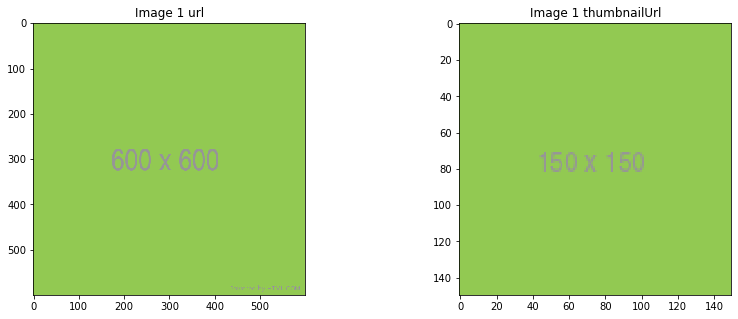

In [4]:
%matplotlib inline

pict1 = requests.get(album_df['url'][0])
img1 = Image.open(BytesIO(pict1.content))
pict2 = requests.get(album_df['thumbnailUrl'][0])
img2 = Image.open(BytesIO(pict2.content))

fig = plt.figure(figsize=(14, 5))
ax = [fig.add_subplot(1, 2, k) for k in range(1,3)]

ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].set_title('Image 1 url')
ax[1].set_title('Image 1 thumbnailUrl')

In order to count the number of pictures for each album we can exploit the groupby method of pandas DataFrame. After counting the number of pictures we print them.

In [5]:
# groupby albumId and compute number of pictures
pict_num_df = album_df.groupby(['albumId']).count()['id']

# print for each album the number of pictures:
for id_ in range(len(pict_num_df)):
    print('Album ID: {}, number of pictures: {}'.format(id_+1, pict_num_df.iloc[id_]))

Album ID: 1, number of pictures: 50
Album ID: 2, number of pictures: 50
Album ID: 3, number of pictures: 50
Album ID: 4, number of pictures: 50
Album ID: 5, number of pictures: 50
Album ID: 6, number of pictures: 50
Album ID: 7, number of pictures: 50
Album ID: 8, number of pictures: 50
Album ID: 9, number of pictures: 50
Album ID: 10, number of pictures: 50
Album ID: 11, number of pictures: 50
Album ID: 12, number of pictures: 50
Album ID: 13, number of pictures: 50
Album ID: 14, number of pictures: 50
Album ID: 15, number of pictures: 50
Album ID: 16, number of pictures: 50
Album ID: 17, number of pictures: 50
Album ID: 18, number of pictures: 50
Album ID: 19, number of pictures: 50
Album ID: 20, number of pictures: 50
Album ID: 21, number of pictures: 50
Album ID: 22, number of pictures: 50
Album ID: 23, number of pictures: 50
Album ID: 24, number of pictures: 50
Album ID: 25, number of pictures: 50
Album ID: 26, number of pictures: 50
Album ID: 27, number of pictures: 50
Album ID: 